<a href="https://colab.research.google.com/github/Manishaneeli/FMML_Project_and_Labs/blob/main/AIML_Course_Probability_Primer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Statistics and Probability

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px

In [22]:
def weather_changes(number_of_days=7):
    return pd.Series(np.random.choice(['rainy','cloudy' ,'sunny'], number_of_days))

def ipl_srh_scores(number_of_matches=15):
    return pd.Series(np.random.randint(50,60,number_of_matches))

In [18]:
results = weather_changes()
print(results.value_counts())
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values,
                        marker_color='green')])
fig.show()

rainy     3
cloudy    3
sunny     1
Name: count, dtype: int64


#Derived Probability Distributions

In [15]:
results = pd.Series([np.sum(weather_changes(5) == 'rainy') for _ in range(7000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values,
                        marker_color='yellow')])
fig.show()

In [40]:
results = {shots: ipl_srh_scores(shots) for shots in [40,45,50,60,65 ]}
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),
                        y=result.value_counts().values / shots,)
                    for shots, result in results.items()])
fig.add_shape(type='line', x0=49.5, y0=1/10, x1=59.6, y1=1/10, line=dict(color='Red',))
fig.show()

Try to solve for these:

If you have a shuffled deck of 52 cards, there are 4 aces, 4 kings, 4 queeens, 4 jacks, and 4 of each numbered card from 2 to 10. What is the probability that if you draw a card at random it will be a numbered card.

In the same setup as above, you take on card out and look at it, put it back into the deck and shuffle it. Now you pull another card output. What is the probability that both the cards you pulled out are numbered cards.

Same Problem as above, but now when you pull out one card, you throw it out and do not put it back into the deck. Find the probability now that they are both numbered cards that you drew.

Now the deck of card is not shuffled. All the cards are in sorted order, first all the cards from Ace to King of Spades, then Hearts, then Diamonds and then Clubs. You are asked to cut the deck (break it into 2 parts, i.e. pick some cards from the top) at a random location. What is the probability that the bottom card of your cut is an numbered cards card.

In [47]:
#answers
#1
def probability_of_numbered_card(number_of_draws=1):
    total_cards = 52
    numbered_cards = 4 * 9
    probability = numbered_cards / total_cards
    return probability
#2
def probability_both_numbered_with_replacement(number_of_draws=2):
    single_draw_probability = probability_of_numbered_card()
    both_draw_probability = single_draw_probability ** number_of_draws
    return both_draw_probability
#3
def probability_both_numbered_without_replacement(number_of_draws=2):
    total_cards = 52
    numbered_cards = 4 * 9

    if number_of_draws > total_cards:
        raise ValueError("Number of draws cannot exceed the number of cards in the deck.")

    probability = 1
    for i in range(number_of_draws):
        probability *= (numbered_cards - i) / (total_cards - i)

    return probability
#4
def probability_bottom_card_numbered_sorted_deck():
    total_cards = 51
    numbered_cards = 4 * 9
    probability = numbered_cards / total_cards
    return probability

# Example usage
if __name__ == "__main__":
    print("The probability of drawing a numbered card is:", probability_of_numbered_card())
    print("The probability that both drawn cards are numbered cards (with replacement) is:", probability_both_numbered_with_replacement())
    print("The probability that both drawn cards are numbered cards (without replacement) is:", probability_both_numbered_without_replacement())
    print("The probability that the bottom card of the cut is a numbered card (sorted deck) is:", probability_bottom_card_numbered_sorted_deck())


The probability of drawing a numbered card is: 0.6923076923076923
The probability that both drawn cards are numbered cards (with replacement) is: 0.4792899408284023
The probability that both drawn cards are numbered cards (without replacement) is: 0.4751131221719457
The probability that the bottom card of the cut is a numbered card (sorted deck) is: 0.7058823529411765


Question :
You have a suffled deck of 52 cards, 4 of which are aces. You are to draw cards one by one and throw them out. As soon as you see an ace you stop. How many non-ace cards did you throw out?

In [116]:
def simulate_game():
    deck_cards = np.array(['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K'] * 4)  # Creating a deck of cards
    np.random.shuffle(deck_cards)
    non_ace_card_count = 0


    for cards in deck_cards:
        if cards != 'A':
            non_ace_card_count += 1
        else:
            break  # If an ace is drawn, stop the game

    return non_ace_card_count


non_ace_cards_count = simulate_game()

print("Number of non-ace cards drawn before encountering an ace:", non_ace_cards_count)

Number of non-ace cards drawn before encountering an ace: 48


In [52]:
results = pd.Series(cards_thrown_counts)
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

#Measurement of Errors
#Mean Squared  Error

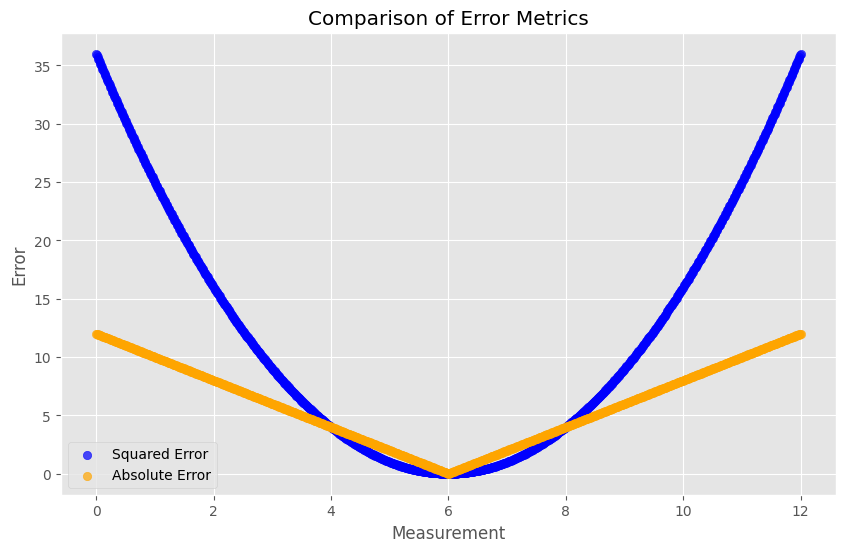

In [53]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(10, 6))

measurements = np.linspace(0, 12, 1000)


true_value = 6
error_multiplier = 2


squared_error = (measurements - true_value) ** 2
absolute_error = abs(measurements - true_value) * error_multiplier


plt.scatter(measurements, squared_error, label='Squared Error', color='blue', alpha=0.7)
plt.scatter(measurements, absolute_error, label='Absolute Error', color='orange', alpha=0.7)


plt.xlabel('Measurement')
plt.ylabel('Error')
plt.title('Comparison of Error Metrics')
plt.legend()

plt.show()


#Standardisation

In [89]:

grades = pd.read_csv("/content/drive/MyDrive/grades.csv")
print(grades.shape)
print(grades.head())



(26, 4)
        Name  Physics  Biology  Maths
0     Arnold       80       78     70
1        Bob       60       98     45
2  Cassandra       34       56     65
3    Donovan       56       65     32
4      Emily       98       23     55


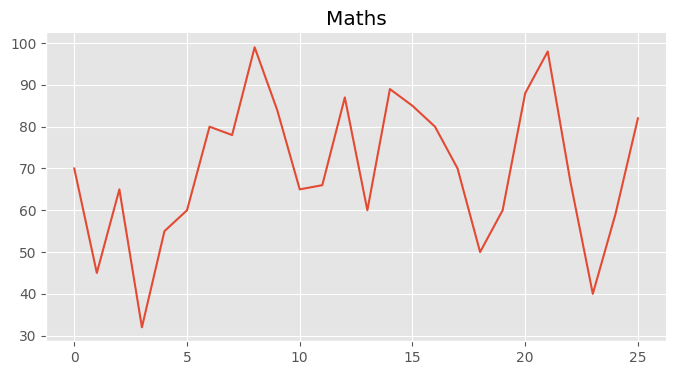

In [87]:

from matplotlib import pyplot as plt
grades['Maths'].plot(kind='line', figsize=(8, 4), title='Maths')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
df_8['Maths'].plot(kind='line', figsize=(8, 4), title='Maths')
plt.gca().spines[['top', 'right']].set_visible(False)

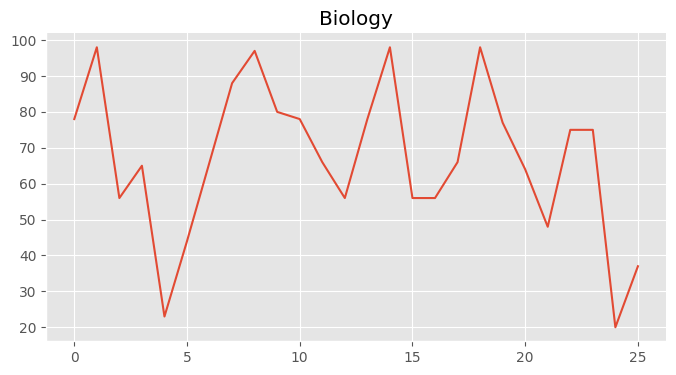

In [85]:
# @title Biology

from matplotlib import pyplot as plt
grades['Biology'].plot(kind='line', figsize=(8, 4), title='Biology')
plt.gca().spines[['top', 'right']].set_visible(False)

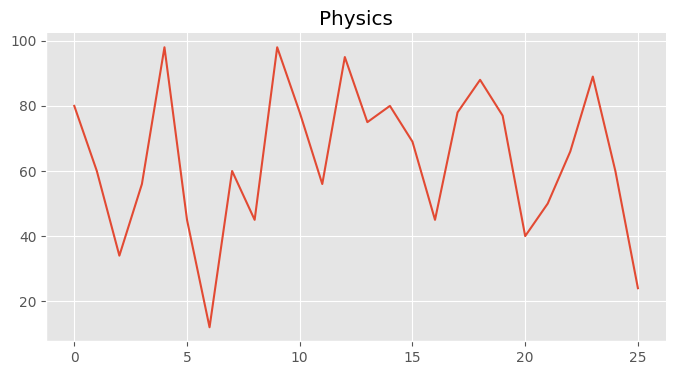

In [84]:


from matplotlib import pyplot as plt
grades['Physics'].plot(kind='line', figsize=(8, 4), title='Physics')
plt.gca().spines[['top', 'right']].set_visible(False)

In [82]:

numeric_stats = grades.select_dtypes(include='number').agg(["mean", "var", "std"])
print(numeric_stats)

         Physics     Biology       Maths
mean   63.769231   67.038462   69.769231
var   517.224615  456.758462  300.664615
std    22.742573   21.371908   17.339683


In [113]:
grades["Physics_std"] = (grades["Physics"] - grades["Physics"].mean()) / grades["Physics"].std()
print(grades.head())

        Name  Physics  Biology  Maths  Physics_std  Maths_std
0     Arnold       80       78     70     0.713673   0.013309
1        Bob       60       98     45    -0.165735  -1.428471
2  Cassandra       34       56     65    -1.308965  -0.275047
3    Donovan       56       65     32    -0.341616  -2.178196
4      Emily       98       23     55     1.505141  -0.851759


In [114]:
grades["Maths_std"] = (grades["Maths"] - grades["Maths"].mean()) / grades["Maths"].std()
print(grades.head())

        Name  Physics  Biology  Maths  Physics_std  Maths_std
0     Arnold       80       78     70     0.713673   0.013309
1        Bob       60       98     45    -0.165735  -1.428471
2  Cassandra       34       56     65    -1.308965  -0.275047
3    Donovan       56       65     32    -0.341616  -2.178196
4      Emily       98       23     55     1.505141  -0.851759


#Binomial Distribution

In [95]:
from scipy.stats import binom
binom.pmf(k=3, n=6, p=0.75)

0.13183593749999992

In [97]:
binom.pmf(k=6, n=9, p=0.25) - binom.pmf(k=4, n=4, p=0.25)

0.004745483398437505

In [100]:
binom.cdf(5, n=7, p=0.50)

0.9375

#Normal Distribution

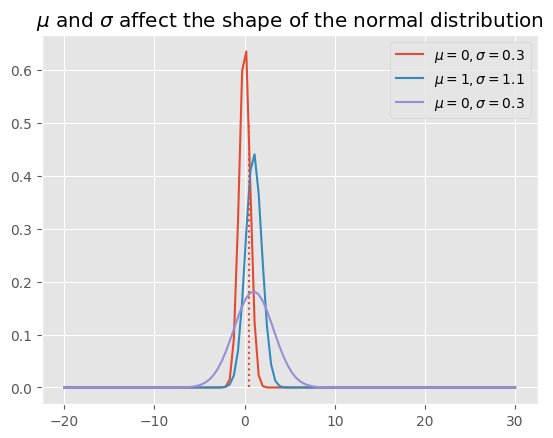

In [101]:
from scipy.stats import norm
x = np.linspace(-20, 30, 110)
f1 = norm.pdf(x, loc=0, scale=0.6)
f2 = norm.pdf(x, loc=1, scale=0.9)
f3 = norm.pdf(x, loc=1, scale=2.2)

plt.plot(x, f1, label="$\mu=0, \sigma=0.3$")
plt.plot(x, f2, label="$\mu=1, \sigma=1.1$")
plt.plot(x, f3, label="$\mu=0, \sigma=0.3$")
plt.vlines(x=0.5, ymin=0, ymax=0.5, linestyles="dotted")

plt.legend()
plt.title("$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.show()

In [102]:
norm.cdf(1)

0.8413447460685429

In [104]:
norm.ppf(0.7)

0.5244005127080407

In [105]:
norm.ppf(0.56, loc=100.11, scale=3.27)

100.60366933467446

In [106]:
100.11+2*3.27

106.65

In [107]:
norm.ppf(0.0026, loc=100.11, scale=3.27)

90.97239090908599

#Poission  Distribution
The Poisson distribution models the count of random events happening in a fixed interval. It's used when events occur independently, and only the interval length affects the count. It's characterized by a single parameter, λ (lambda), representing the average rate of events. The probability of observing \(k\) events in the interval is given by \(p(X=k) = \frac{e^{-\lambda} \lambda^k}{k!}\), where \(e\) is the base of natural logarithm.




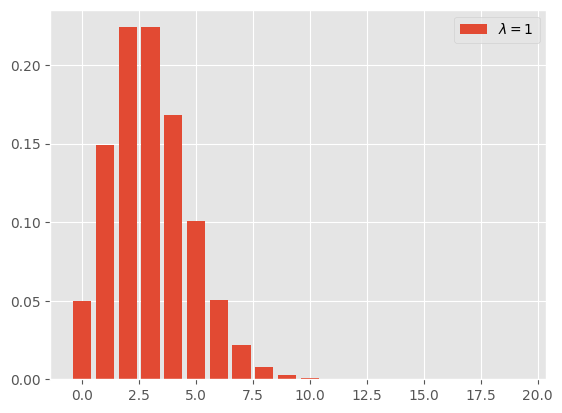

In [68]:
from scipy.stats import poisson
x = np.arange(20)
f1 = poisson.pmf(x, mu=3)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=1)

plt.bar(x, f1, label="$\lambda=1$")
plt.legend()


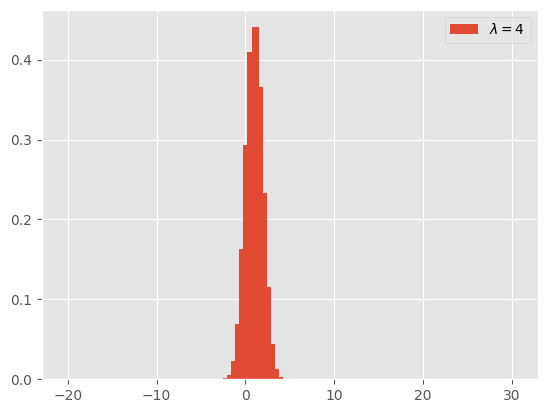

In [111]:

plt.bar(x, f2, label="$\lambda=4$")
plt.legend()

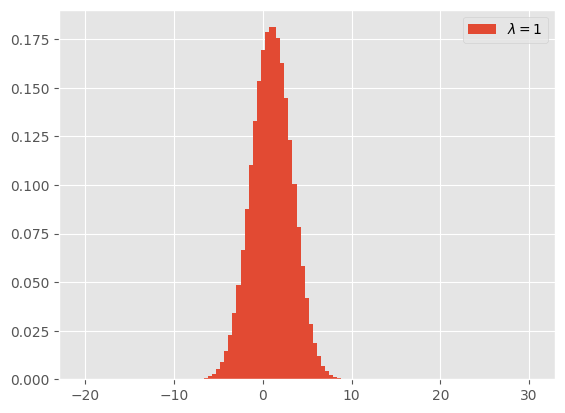

In [110]:
plt.bar(x, f3, label="$\lambda=1$")
plt.legend()

In [112]:
poisson.pmf(4, 1)

0.015328310048810101

#Central Limit Theorem

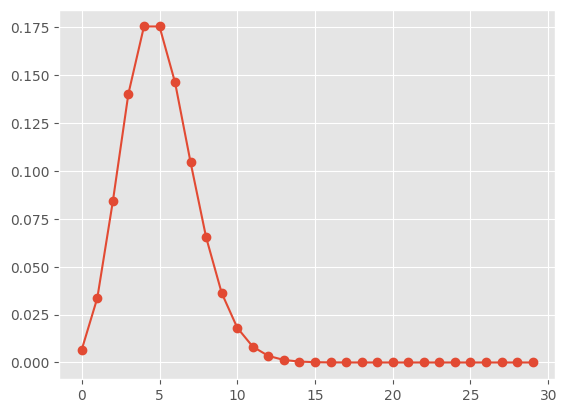

In [65]:
from scipy.stats import poisson
bins = np.arange(0, 30)
p_pois = poisson.pmf(bins, mu=5)
plt.plot(bins, p_pois, marker='o', linestyle='-')

(array([ 5., 10., 22., 40., 36., 37., 31., 14.,  4.,  1.]),
 array([3.2 , 3.59, 3.98, 4.37, 4.76, 5.15, 5.54, 5.93, 6.32, 6.71, 7.1 ]),
 <BarContainer object of 10 artists>)

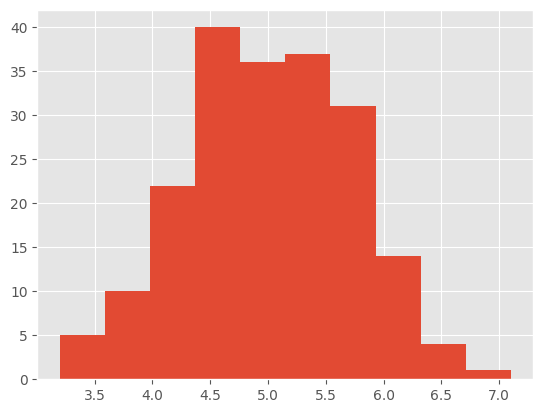

In [66]:
def sample_pois(_):
    samples = poisson.rvs(mu=5, size=10)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(200)))
plt.hist(means)

#Normal Distribution in Weight Intialization

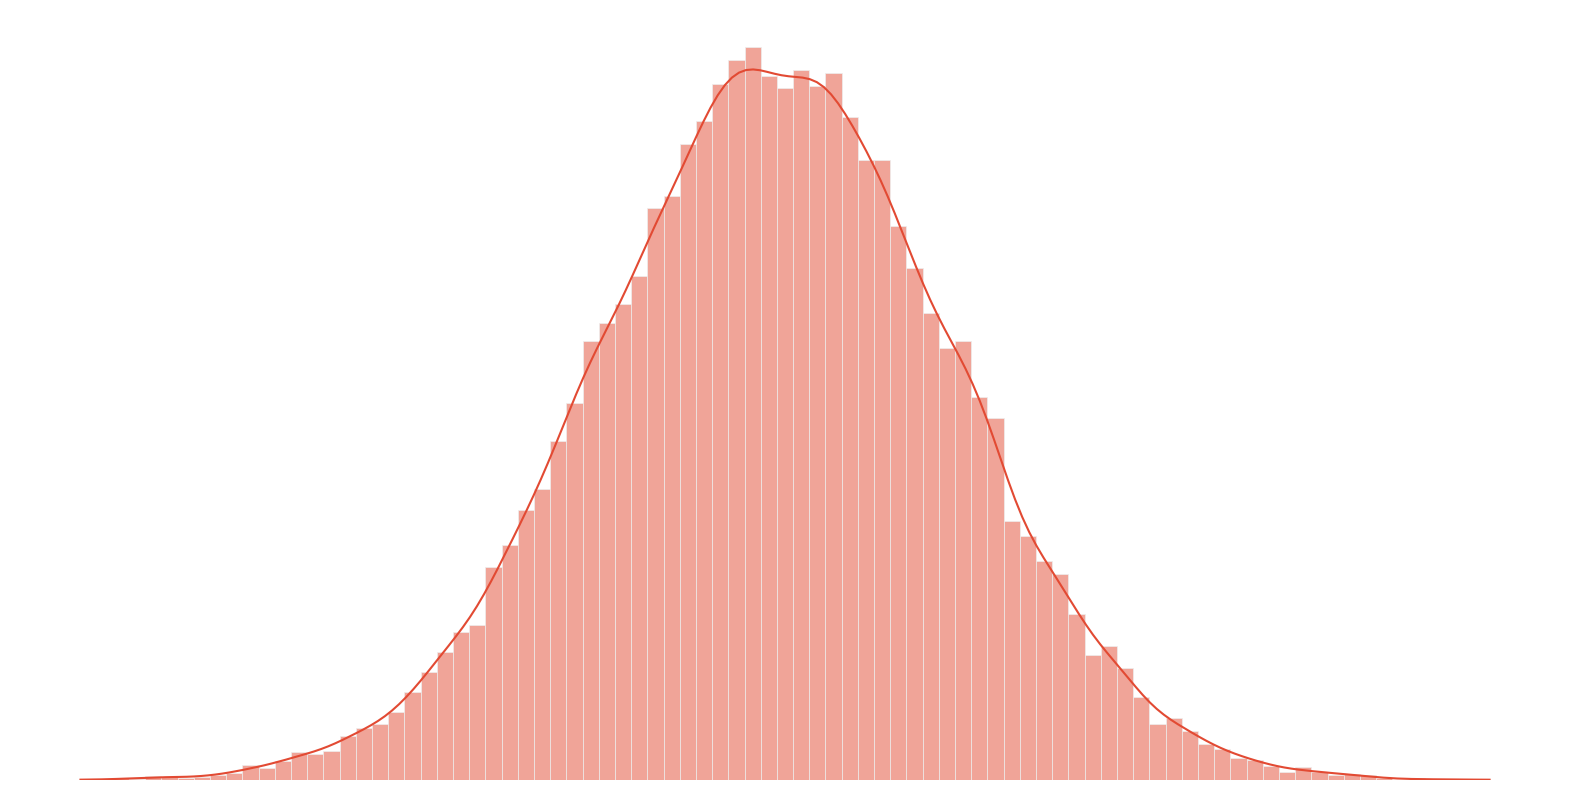

In [63]:
import seaborn as sns
plt.figure(figsize=(20, 10))
x = np.random.normal(size=(25000))
sns.histplot(x, kde=True)
plt.axis('off')
plt.show()

#Entropy
Entropy is a versatile measure that can be applied to a wide range of data types and contexts. By calculating and visualizing entropy, we can gain insights into the variability, uncertainty, or information content of different datasets, helping us understand and analyze them more effectively.

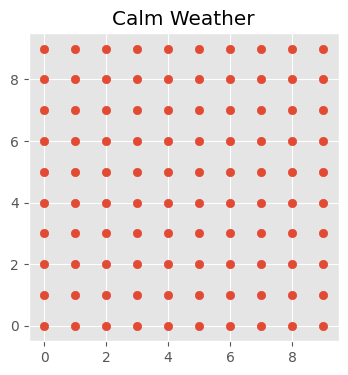

In [56]:


x_calm, y_calm = np.meshgrid(np.arange(10), np.arange(10))
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x_calm.ravel(), y_calm.ravel())
ax.set_xlim(-0.5, 9.5)
ax.set_ylim(-0.5, 9.5)
ax.set_title('Calm Weather')

plt.show()


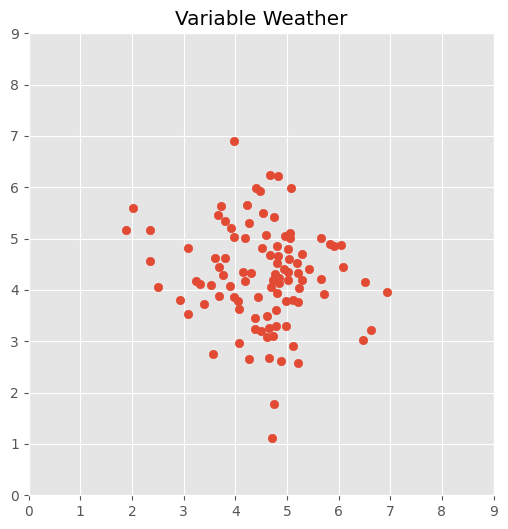

In [59]:
x_variable, y_variable = np.random.normal(loc=4.5, scale=1.0, size=(2, 100))
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x_variable.ravel(), y_variable.ravel())
ax.set_xlim(0, 9)
ax.set_ylim(0, 9)
ax.set_title('Variable Weather')

plt.show()


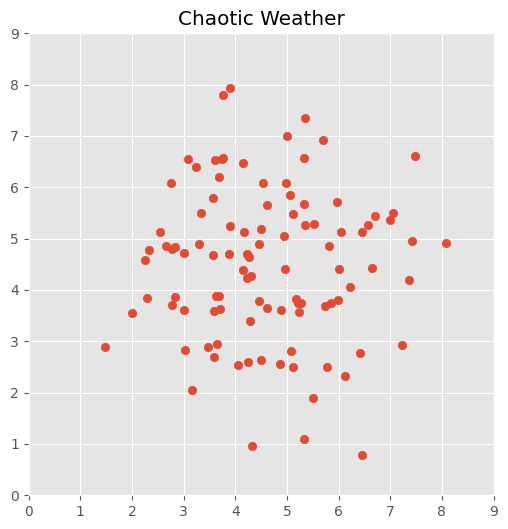

In [60]:
# Generate data for Chaotic Weather with high entropy
x_chaotic, y_chaotic = np.random.normal(loc=4.5, scale=1.5, size=(2, 100))

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x_chaotic.ravel(), y_chaotic.ravel())
ax.set_xlim(0, 9)
ax.set_ylim(0, 9)
ax.set_title('Chaotic Weather')

plt.show()
